In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress warnings


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
from tensorflow.keras import layers, models

# Define a residual block for ResNet-9
def residual_block(x, filters):
    shortcut = x
    # Apply 1x1 convolution if the number of filters changes
    if x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=(1, 1), padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # Convolutional layers
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Add the shortcut (residual connection)
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

# Define ResNet-9 architecture
def resnet9(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolutional Layer
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Blocks (fewer blocks for ResNet-9)
    x = residual_block(x, 64)
    x = residual_block(x, 128)

    # Global Average Pooling and Output Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=x)

    return model


In [4]:
from tensorflow.keras import optimizers

# Instantiate the ResNet-9 model
model = resnet9()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Small learning rate
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     73,856 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    147,584 │ re_lu_3[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      8,320 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_5[0][0]  

 Total params: 309,002 (1.18 MB)

 Trainable params: 307,850 (1.17 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [5]:
# Train the model with reduced epochs and batch size
history = model.fit(
    x_train, y_train,              # Training data
    batch_size=32,                 # Smaller batch size to reduce memory usage
    epochs=5,                      # Reduced epochs to speed up training
    validation_data=(x_test, y_test),  # Use validation data
    verbose=2                      # Less verbose output
)


Epoch 1/5
1563/1563 - 76s - 49ms/step - accuracy: 0.4951 - loss: 1.4042 - val_accuracy: 0.4660 - val_loss: 1.4775
Epoch 2/5
1563/1563 - 75s - 48ms/step - accuracy: 0.6190 - loss: 1.0803 - val_accuracy: 0.5632 - val_loss: 1.2143
Epoch 3/5
1563/1563 - 75s - 48ms/step - accuracy: 0.6667 - loss: 0.9485 - val_accuracy: 0.5066 - val_loss: 1.5879
Epoch 4/5
1563/1563 - 75s - 48ms/step - accuracy: 0.6991 - loss: 0.8613 - val_accuracy: 0.4251 - val_loss: 2.2676
Epoch 5/5
1563/1563 - 76s - 48ms/step - accuracy: 0.7234 - loss: 0.7924 - val_accuracy: 0.5936 - val_loss: 1.2486


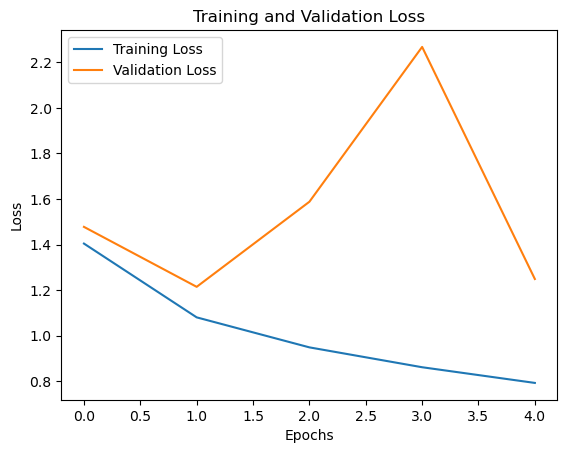

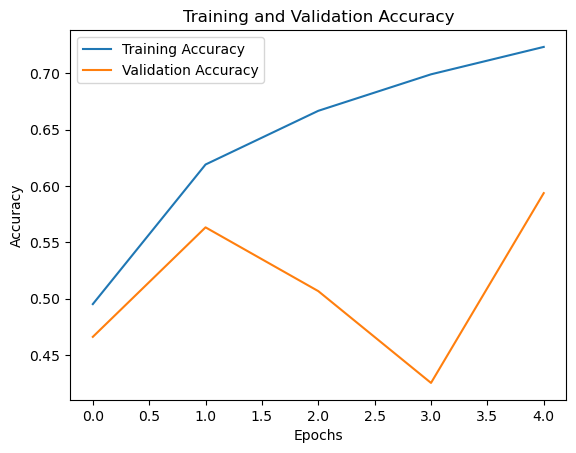

In [6]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


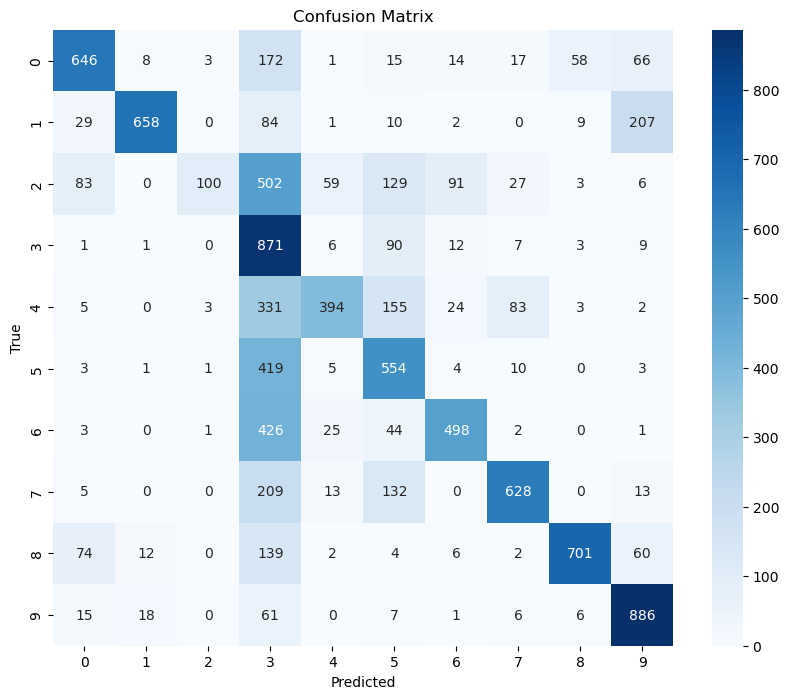

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [8]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 3s - 10ms/step - accuracy: 0.5936 - loss: 1.2486
Test Accuracy: 59.36%
Test Loss: 1.2486


In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Define MobileNet model for CIFAR-10
def mobilenet_model(input_shape=(32, 32, 3), num_classes=10):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights=None)  # No fine-tuning, random weights
    
    # Add custom layers on top of MobileNetV2
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')  # Output layer for CIFAR-10 classes
    ])
    
    return model


In [10]:
from tensorflow.keras import optimizers

# Instantiate the MobileNet model
model2 = mobilenet_model()

# Compile the model with Adam optimizer and a small learning rate
model2.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Small learning rate
    metrics=['accuracy']
)

# Print model summary
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32             │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 2,236,682 (8.53 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# Train the model with reduced epochs and batch size
history = model2.fit(
    x_train, y_train,              # Training data
    batch_size=32,                 # Smaller batch size to reduce memory usage
    epochs=5,                      # Reduced epochs to speed up training
    validation_data=(x_test, y_test),  # Use validation data
    verbose=2                      # Less verbose output
)


Epoch 1/5
1563/1563 - 1043s - 667ms/step - accuracy: 0.2704 - loss: 2.0044 - val_accuracy: 0.1000 - val_loss: 2.3165
Epoch 2/5


In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set with MobileNet
y_pred_mobilenet = model2.predict(x_test)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix for MobileNet
cm_mobilenet = confusion_matrix(y_true, y_pred_classes_mobilenet)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix for MobileNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Evaluate the MobileNet model on test data
test_loss_mobilenet, test_accuracy_mobilenet = model2.evaluate(x_test, y_test, verbose=2)
print(f"MobileNet Test Accuracy: {test_accuracy_mobilenet * 100:.2f}%")
print(f"MobileNet Test Loss: {test_loss_mobilenet:.4f}")


In [ ]:
from tensorflow.keras import layers, models

# Define AlexNet model for CIFAR-10
def alexnet_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Flatten(),
        
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        layers.Dense(num_classes, activation='softmax')  # Output layer for CIFAR-10 classes
    ])
    
    return model


In [ ]:
from tensorflow.keras import optimizers

# Instantiate the AlexNet model
alexnet = alexnet_model()

# Compile the model
alexnet.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Small learning rate
    metrics=['accuracy']
)

# Print model summary
alexnet.summary()


In [ ]:
# Train the model with reduced epochs and batch size
alexnet_history = alexnet.fit(
    x_train, y_train,              # Training data
    batch_size=32,                 # Smaller batch size to reduce memory usage
    epochs=5,                      # Reduced epochs to speed up training
    validation_data=(x_test, y_test),  # Use validation data
    verbose=2                      # Less verbose output
)


In [ ]:
# Plot Training and Validation Loss Curve
plt.plot(alexnet_history.history['loss'], label='Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy Curve
plt.plot(alexnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set with AlexNet
y_pred_alexnet = alexnet.predict(x_test)
y_pred_classes_alexnet = np.argmax(y_pred_alexnet, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix for AlexNet
cm_alexnet = confusion_matrix(y_true, y_pred_classes_alexnet)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_alexnet, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix for AlexNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Evaluate the AlexNet model on test data
test_loss_alexnet, test_accuracy_alexnet = alexnet.evaluate(x_test, y_test, verbose=2)
print(f"AlexNet Test Accuracy: {test_accuracy_alexnet * 100:.2f}%")
print(f"AlexNet Test Loss: {test_loss_alexnet:.4f}")
